# Value Functions & Bellman Equations

## Specifying Policies

- A *policy* maps the current *state* onto a set of *probabilities for taking each action*
- *Policies* can *only depend* on the current *state*

- Deterministic policy notation

$$
\pi(s) = a
$$

- Stochastic policy notation

$$

\begin{gather*}
\pi(a|s)\\
\sum_{a\in\mathcal{A}(s)}{\pi(a|s)}=1\\
\pi(a|s)\geq 0
\end{gather*}
$$


## Value functions

- *State-value functions* represent the *expected return* from a *given state* under a *specific policy*
- *Action-value functions* represent the *expected return from a *given state* after taking a *specific action*, later following a *specific policy*

### State-value functions

$$
v_\pi(s) \doteq \mathbb{E}_\pi[G_t|S_t=s]
$$

### Action-value functions

$$
q_\pi(s,a) \doteq \mathbb{E}_\pi[G_t|S_t=s,A_t=a]
$$

## Bellman Equation Derivation

### Preliminaries

- Marginalization

$$
p(a)=\sum_{b}p(a,b) \tag{1}
$$

- Multiplication Theorem

$$
\begin{gather*}
p(a,b)=p(a|b)p(b) \\
p(a,b|c)=p(a|b,c)p(b|c) \tag{2}
\end{gather*}
$$

- Conditional Expectation

$$
\sum_a{\mathbb{E}[Y|a]p(a)} = \mathbb{E}[Y] \tag{3}
$$

- Law of total Expectation

$$
\mathbb{E}[X]=\mathbb{E}\left[\mathbb{E}[X|Y]\right] \tag{4}
$$

- Transition probability

$$
\pi(a|s)=p(a|s) \tag{5}
$$

- Expected value of immediate reward

$$
r=r(s,a,s')=E_\pi[R_{t+1}|S_t=s,A_t=a,S_{t+1}=s'] \tag{6}
$$

### State-value Bellman Equation

$$
v_\pi(s) = \sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)\left[r+\gamma v_\pi(s')\right],\ \forall{s\in\mathcal{S}}
$$

#### Derivation

$$
\begin{align*}
v_\pi(s) &\doteq \mathbb{E}_\pi[G_t|S_t=s] \\
         &= \mathbb{E}_\pi[R_{t+1}+\gamma G_{t+1}|S_t=s] \\
         &= \sum_{a}\pi(a|s)\sum_{s'}p(s'|s,a)\mathbb{E}_\pi[R_{t+1}+\gamma G_{t+1}|S_t=s,A_t=a,S_{t+1}=s'] & \text{from (3)}\\
         &= \sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)\mathbb{E}_\pi[R_{t+1}+\gamma G_{t+1}|\underbrace{S_t=s,A_t=a}_{\text{ignorable}},S_{t+1}=s'] & \text{from (1)}\\
         &= \sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma\mathbb{E}_\pi[G_{t+1}|S_{t+1}=s']] & \text{from (6)}\\
         &= \sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)\left[r+\gamma v_\pi(s')\right]
\end{align*}
$$

### Action-value Bellman Equation

$$
q_\pi(s,a) = \sum_{s',r}p(s',r|s,a)\left[r+\gamma\sum_{a'}\pi(a'|s')q_\pi(s',a')\right],\ \forall{s\in\mathcal{S}},\ \forall{a\in\mathcal{A}}
$$

#### Derivation

$$
\begin{align*}
q_\pi(s,a) &\doteq \mathbb{E}_\pi[G_t|S_t=s,A_t=a] \\
           &= \sum_{s',r}p(s',r|s,a)\mathbb{E}_\pi[G_t|S_{t+1}=s'] \\
           &= \sum_{s',r}p(s',r|s,a)\mathbb{E}_\pi[R_{t+1}+\gamma G_{t+1}|S_{t+1}=s'] \\
           &= \sum_{s',r}p(s',r|s,a)\left[r+\gamma\sum_{a'}\pi(a'|s')\mathbb{E}_\pi[G_{t+1}|S_{t+1}=s',A_{t+1}=a']\right] \\
           &= \sum_{s',r}p(s',r|s,a)\left[r+\gamma\sum_{a'}\pi(a'|s')q_\pi(s',a')\right] \\
\end{align*}
$$

### Why Bellman Equation

- We can use the *Bellman Equation* to solve for a *value function* by writing a *system of linear equatinos*
- We can only solve *small MDPs* directly, but *Bellman Equations* will factor into the solutions we see

## Example: Gridworld

In [4]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25


def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward


def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

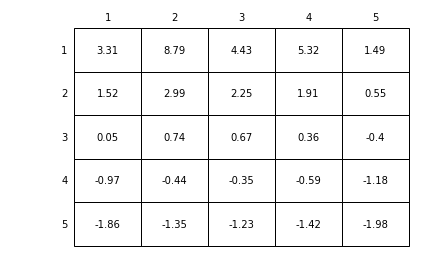

In [10]:
value = np.zeros((WORLD_SIZE, WORLD_SIZE))
while True:
    # keep iteration until convergence
    new_value = np.zeros_like(value)
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            for action in ACTIONS:
                (next_i, next_j), reward = step([i, j], action)
                # bellman equation
                new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])
    if np.sum(np.abs(value - new_value)) < 1e-4:
        draw_image(np.round(new_value, decimals=2))
        break
    value = new_value

## Optimal Policy

- An *optimal policy* is defined as the policy with the *highest possible value function* in *all states*
- *At least* one optimal policy always exists, but there may be more than one
- The *exponential number* of possible policies makes searching for the optimal policy by brute-force intractable

$$
v_\star(s)\doteq\max_{\pi}v_\pi(s),\ \forall{s\in\mathcal{S}}
$$

$$
\begin{align*}
q_\star(s,a) &\doteq \max_{\pi}q_\pi(s,a),\ \forall{s\in\mathcal{S}},\ \forall{a\in\mathcal{A}}\\
             &=\mathbb{E}[R_{t+1}+\gamma v_\star(S_{t+1})|S_t=s,A_t=a]
\end{align*}
$$

## Bellman Optimality Equation

- Bellman Optimality Equation for $v_\star$

$$
\begin{align*}
v_\star(s) &= \max_{a}q_{\pi_\star}(s,a) \\
           &= \max_{a}\mathbb{E}_{\pi_\star}[G_t|S_t=s,A_t=a] \\
           &= \max_{a}\mathbb{E}_{\pi_\star}[R_{t+1}+\gamma G_{t+1}|S_t=s,A_t=a] \\
           &= \max_{a}\mathbb{E}[R_{t+1}+\gamma v_\star(S_{t+1})|S_t=s,A_t=a] \\
            
           &= \max_{a}\sum_{s',r}p(s',r|s,a)[r+\gamma v_\star(s')]
\end{align*}
$$

- Bellman Optimality Equation for $q_\star$

$$
\begin{align*}
q_\star(s,a) &=\mathbb{E}[R_{t+1}+\gamma \max_{a'}v_\star(S_{t+1},a')|S_t=s,A_t=a] \\
             &=\sum_{s',r}p(s',r|s,a)[r+\gamma \max_{a'}q_\star(s',a')]
\end{align*}
$$

### Determining an Optimal Policy

- from optimal state-value function

$$
\pi_\star(s)=\underset{a}{\mathrm{argmax}}\sum_{s',r}p(s',r|s,a)[r+\gamma v_\star(s')]
$$

- from optimal action-value function

$$
\pi_\star(s)=\underset{a}{\mathrm{argmax}}\ q_\star(s,a)
$$

## Example: Optimal solutions for Gridworld


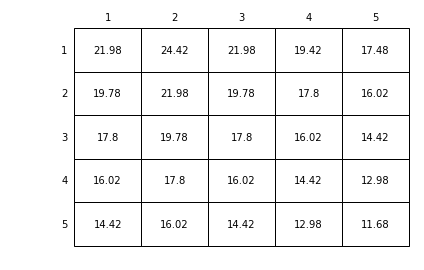

In [9]:
value = np.zeros((WORLD_SIZE, WORLD_SIZE))
while True:
    # keep iteration until convergence
    new_value = np.zeros_like(value)
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            values = []
            for action in ACTIONS:
                (next_i, next_j), reward = step([i, j], action)
                # value iteration
                values.append(reward + DISCOUNT * value[next_i, next_j])
            new_value[i, j] = np.max(values)
    if np.sum(np.abs(new_value - value)) < 1e-4:
        draw_image(np.round(new_value, decimals=2))
        break
    value = new_value